In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data = "../data/datos_act2.xlsx"
data = pd.read_excel(data)
data

,Periodo (s),N (# Latones),error Periodo (s)
0,1.15,0,0.01
1,1.25,1,0.01
2,1.32,2,0.01
3,1.37,3,0.01
4,1.44,4,0.01
5,1.52,5,0.01
6,1.56,6,0.01
7,1.60,7,0.01
8,1.70,8,0.01


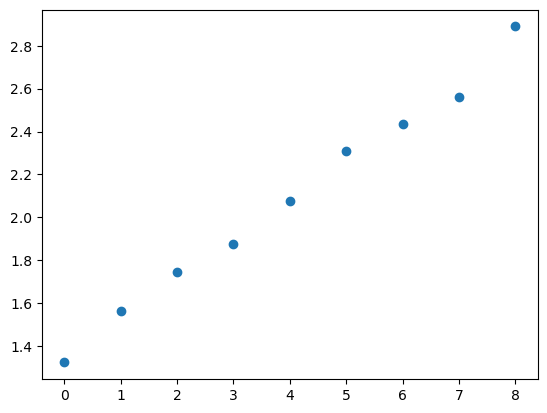

In [5]:
T2= data["Periodo (s)"]**2
N= data["N (# Latones)"]

Terr=data['error Periodo (s)']

plt.scatter(N,T2)

In [6]:
w = 1/(Terr**2)

sum_w = w.sum()
sum_wx = (w*N).sum()
sum_wy = (w*T2).sum()
sum_wxx = (w*N**2).sum()
sum_wxy = (w*N*T2).sum()

m = (sum_w*sum_wxy - sum_wx*sum_wy) / (sum_w*sum_wxx - sum_wx**2)
b = (sum_wxx*sum_wy - sum_wx*sum_wxy) / (sum_w*sum_wxx - sum_wx**2)

m_std_err = np.sqrt(sum_w/(sum_w*sum_wxx-sum_wx**2))
b_std_err = np.sqrt(sum_wxx/(sum_w*sum_wxx-sum_wx**2))

print(m)
print(b)

print(m_std_err)
print(b_std_err)


0.18464
1.3472066666666667
0.0012909944487358056
0.006146362971528592


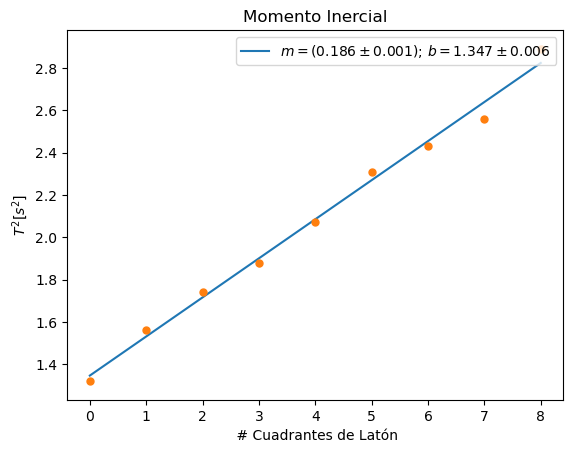

In [7]:
x = np.linspace(0, 8, 1000)
y = m*x+b

plt.plot(x, y, label = r"$m = (0.186\pm 0.001)$" + "; " + r"$b = 1.347\pm 0.006$")
plt.errorbar(N, T2, Terr, fmt="o", markersize=5, capsize=1)

plt.title("Momento Inercial")
plt.xlabel(" # Cuadrantes de Latón")
plt.ylabel(r"$T^2 [s^2]$")
plt.legend(loc="upper right")

plt.savefig("act2_img1")

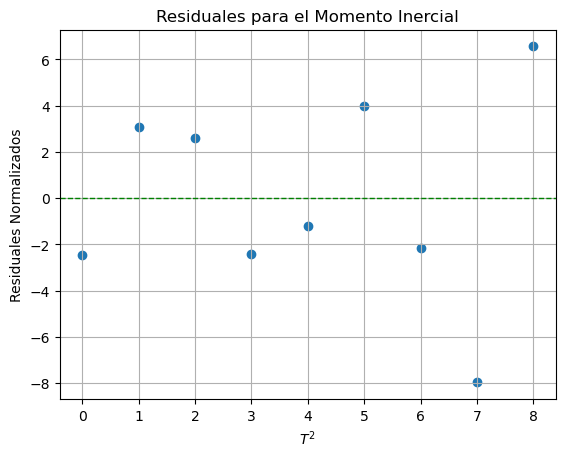

In [8]:
model = m*N+b
res = (T2 - model)/Terr

fig2, (ax2) = plt.subplots(1, 1)

ax2.scatter(N, res)
ax2.axhline(0, color='green', linewidth=1, linestyle='--')

ax2.set_ylabel('Residuales Normalizados')
ax2.set_xlabel(r'$T^2$')
ax2.set_title('Residuales para el Momento Inercial')
ax2.grid()

plt.savefig('act2_img1_res.png', format='png')

In [11]:
M=0.212
R_1=0.05365
R_2=0.0436
Kte=(np.pi**2*M*(R_2**2 +R_2**2))/(2*m)

I=(b*Kte)/(4*np.pi**2)
I

0.0007351183774292315

In [10]:
Kte

0.021541839875685132